### About Dataset

The objective of this project is to develop an effective credit fraud detection system that can accurately identify and prevent fraudulent transactions within a financial institution's ecosystem. With the increasing sophistication of fraudsters and the evolving nature of fraudulent activities, there is a critical need for a robust and adaptive solution that can detect anomalies and suspicious patterns in real-time.

The current scenario highlights a growing concern for financial institutions, as they face significant losses due to fraudulent activities. Traditional rule-based systems and basic anomaly detection methods have proven insufficient in keeping pace with the evolving tactics of fraudsters. This necessitates the development of an advanced, machine learning-based solution that can adapt to new patterns of fraudulent behavior.


### Feature Explanation:

distance_from_home - the distance from home where the transaction happened.

distance_from_last_transaction - the distance from last transaction happened.

ratio_to_median_purchase_price - Ratio of purchased price transaction to median purchase price.

repeat_retailer - Is the transaction happened from same retailer.

used_chip - Is the transaction through chip (credit card).

used_pin_number - Is the transaction happened by using PIN number.

online_order - Is the transaction an online order.

fraud - Is the transaction fraudulent.

In [1]:
#importing the neccessary libraries for the project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

df=pd.read_csv('card_transdata.csv') #reading the file as a pandas dataframe

df.head()  #checking the top 5 records from the dataframe

df.shape #checking the shape of the data

df.info() #checking the outline of the data

#converting the numeric float64 to float32 to for memory efficiency
for col in numeric_cols:
    df[col]=df[col].astype('float32')

#converting the numerical representation of categorical features to category datatype for memory efficiency
for col in categorical_cols:
    df[col]=df[col].astype('int8').astype('category')

df.to_parquet('cardtrans_data_resized') #saving the dataframe as a parquet file for future use

In [2]:
df=pd.read_parquet('cardtrans_data_resized') #reading the data from parquet file

In [3]:
numeric_cols=df.columns[:3]
categorical_cols=df.columns[3:] #classifying data into numeric and categorical for further processing

In [4]:
df.info() #checking the outline of the data after converting to respective datatypes for memory management

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float32
 1   distance_from_last_transaction  1000000 non-null  float32
 2   ratio_to_median_purchase_price  1000000 non-null  float32
 3   repeat_retailer                 1000000 non-null  int8   
 4   used_chip                       1000000 non-null  int8   
 5   used_pin_number                 1000000 non-null  int8   
 6   online_order                    1000000 non-null  int8   
 7   fraud                           1000000 non-null  int8   
dtypes: float32(3), int8(5)
memory usage: 16.2 MB


In [5]:
df.describe() #checking the summary of the data using describe method

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.364578,25.803415,2.798823,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723633,11851.104492,267.802948,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.duplicated().sum() #checking the number of duplicate records in the dataframe

0

In [7]:
df.isnull().sum() #checking the null/blank values from the dataframe

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [242]:
plt.style.use('ggplot')

In [244]:
plt.rcParams['figure.figsize']= [13, 7]

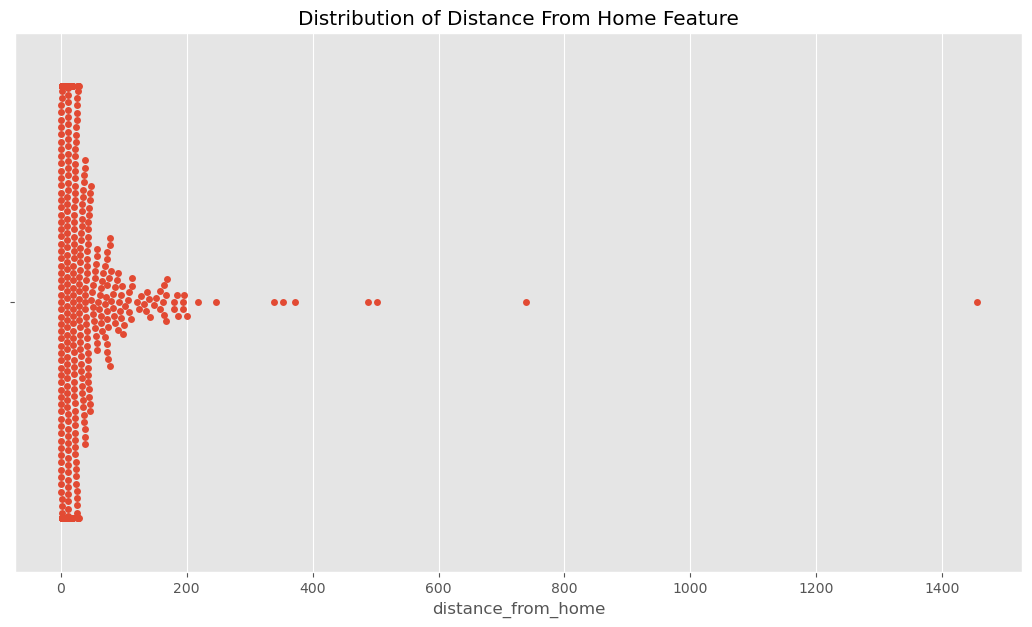

In [44]:
#visualizing the distribution of numerical features using histogram plot
sns.swarmplot(data=df.sample(800,random_state=42),x='distance_from_home')
plt.title('Distribution of Distance From Home Feature')
plt.show()

Insights:
 - From the distribution of the distance from home feature, we can infer that most of the transactions happened between 0 to 20 miles of radius.

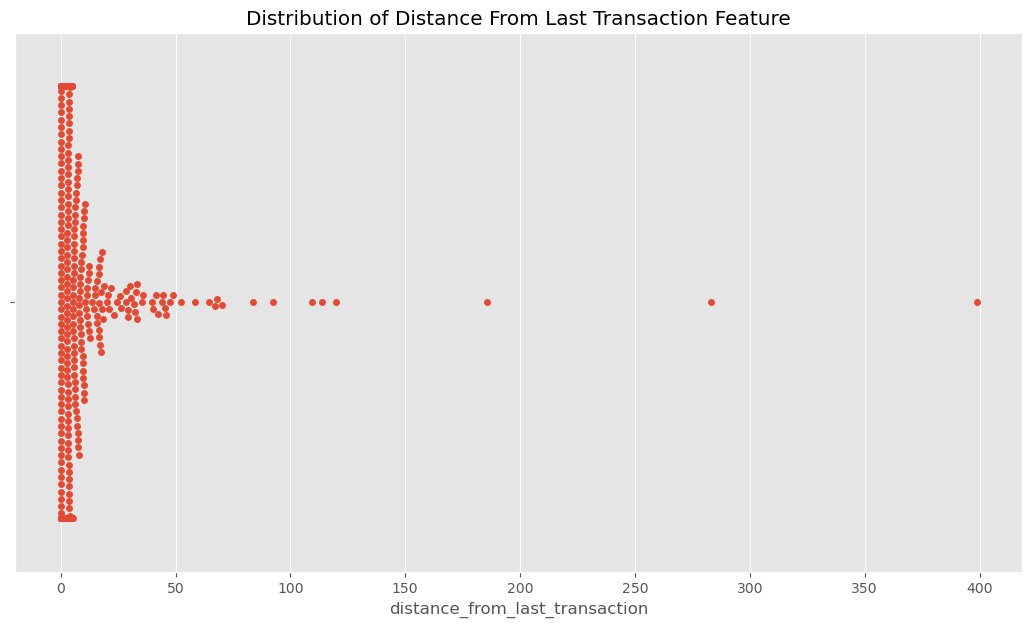

In [45]:
sns.swarmplot(data=df.sample(800,random_state=42),x='distance_from_last_transaction')
plt.title('Distribution of Distance From Last Transaction Feature')
plt.show()

Insights:
 - From the distribution of the distance from last transaction, we can infer that most of the transactions happen between 0 to 5 miles of radius from the previous transaction.

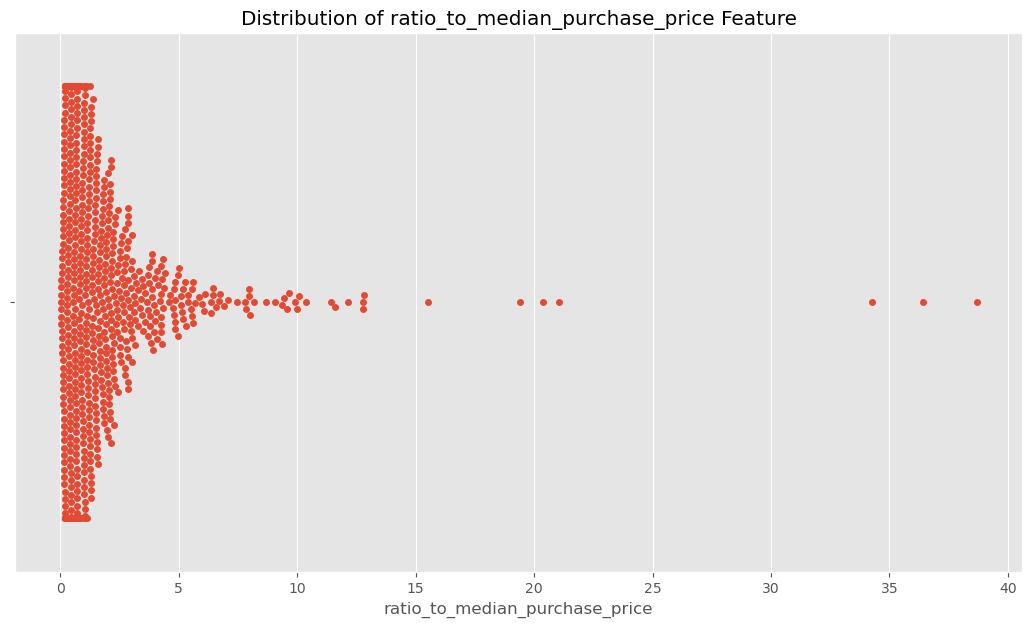

In [46]:
sns.swarmplot(data=df.sample(800,random_state=42),x='ratio_to_median_purchase_price')
plt.title('Distribution of ratio_to_median_purchase_price Feature')
plt.show()

Insights:
 - From the distribution of the ratio to median purchase price feature, we can infer that the ratio between current transaction value and median purchase price for the individual is around 2.

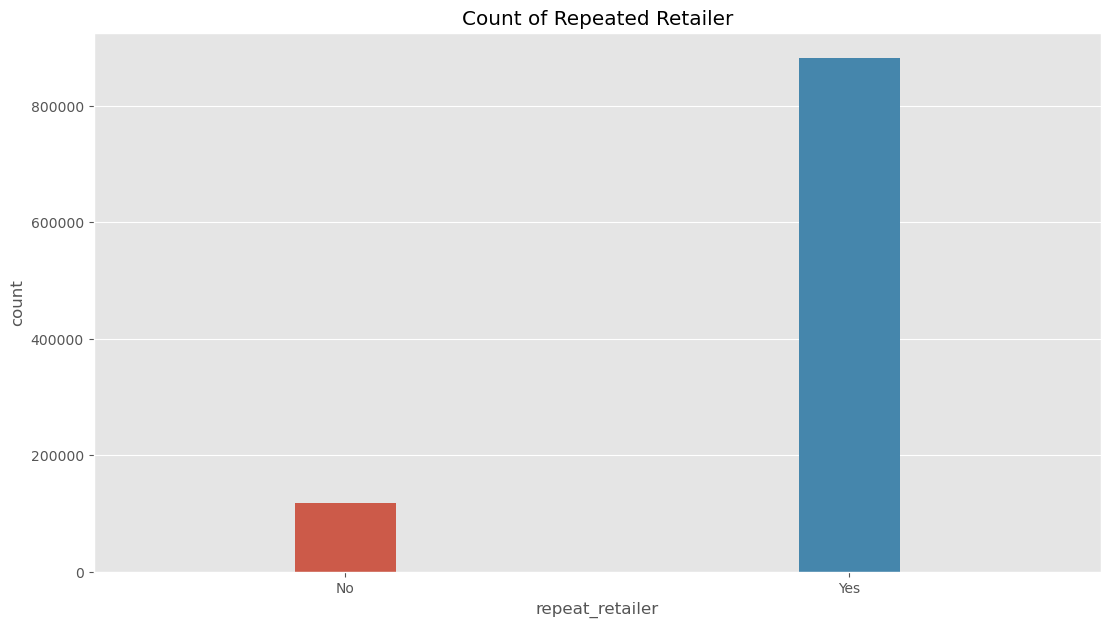

In [12]:
sns.countplot(data=df,x='repeat_retailer',width=0.2)
plt.title('Count of Repeated Retailer')
plt.xticks([0,1],['No','Yes'])
plt.show()

Insights:
 - Around 90% transactions happened with the repeated retailer. Only 10% transactions happened with the new retailer.

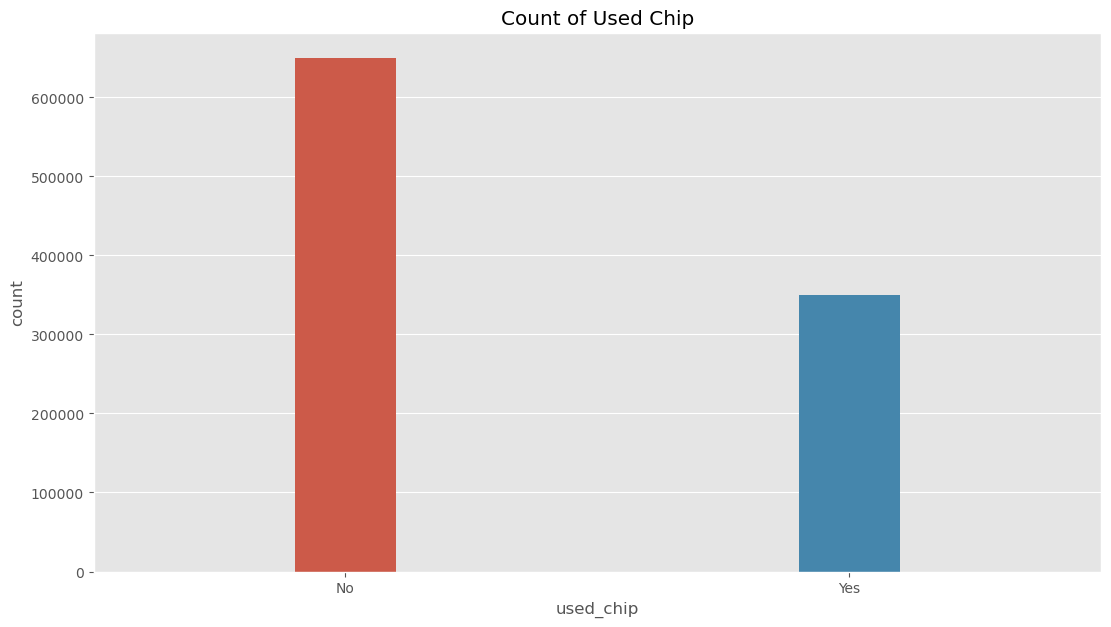

In [13]:
sns.countplot(data=df,x='used_chip',width=0.2)
plt.title('Count of Used Chip')
plt.xticks([0,1],['No','Yes'])
plt.show()

Insights:
 - Around 65% of transactions performed without using chip based cards. Only 35% of transactions performed using chip based cards.

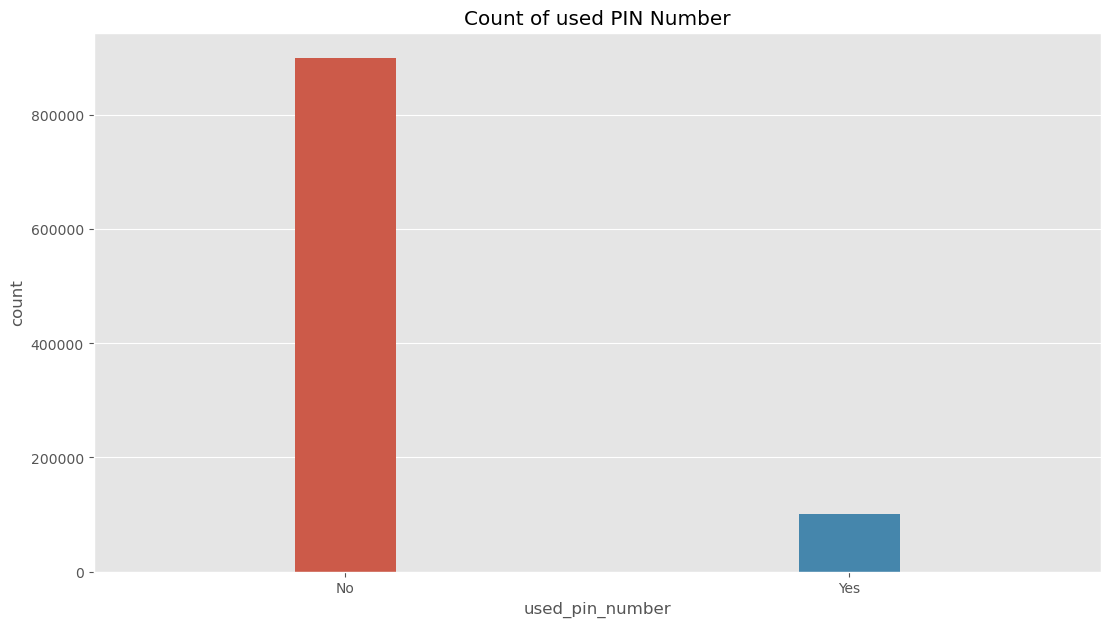

In [14]:
sns.countplot(data=df,x='used_pin_number',width=0.2)
plt.title('Count of used PIN Number')
plt.xticks([0,1],['No','Yes'])
plt.show()

Insights:
 - Around 0.9 millions of transactions performed by entering pin number. Only 0.1 millions of transactions happened without entering pin number.

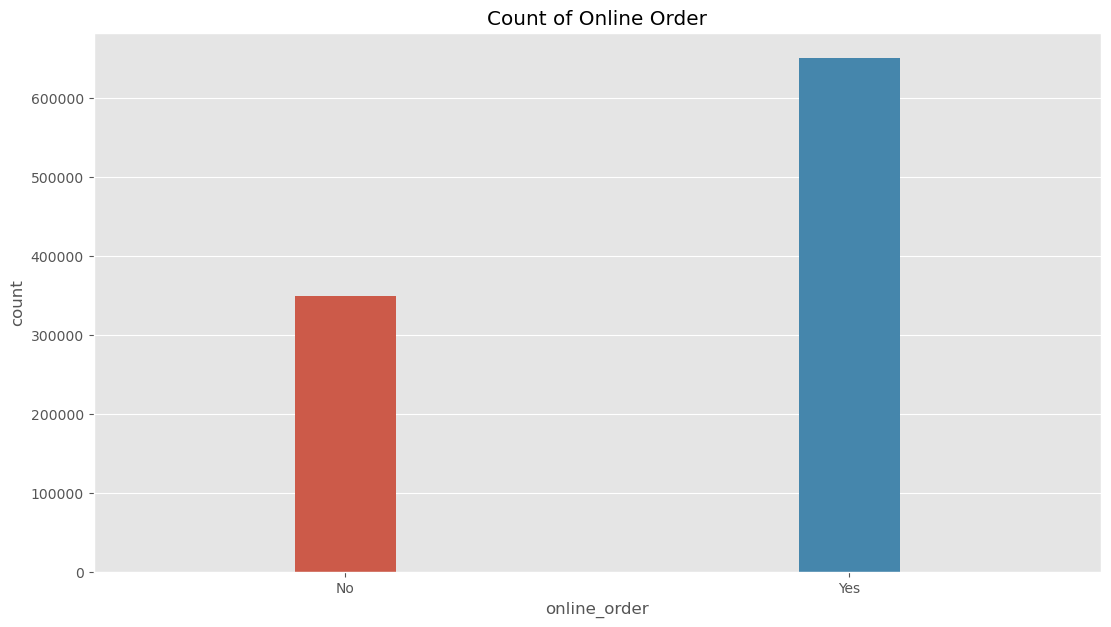

In [15]:
sns.countplot(data=df,x='online_order',width=0.2)
plt.title('Count of Online Order')
plt.xticks([0,1],['No','Yes'])
plt.show()

Insights:
 - Around 65% of transactions are Online Orders. Only 35% transactions were performed offline.

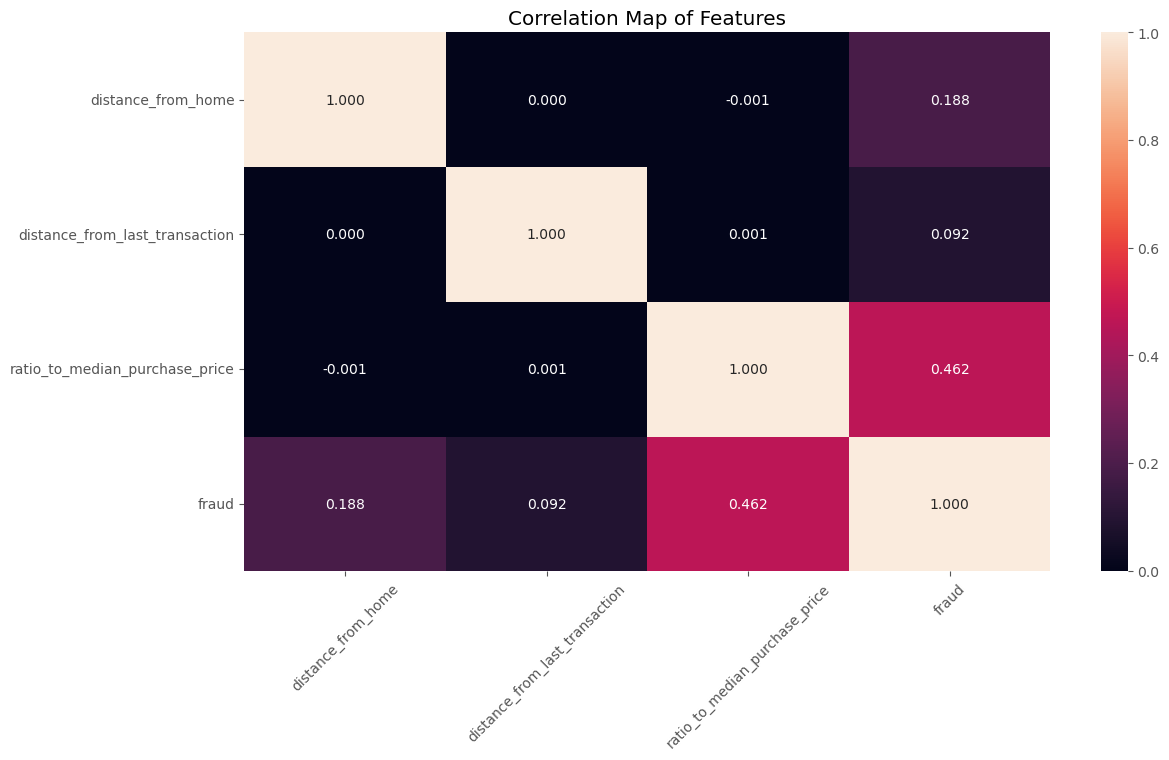

In [54]:
cols=['distance_from_home','distance_from_last_transaction','ratio_to_median_purchase_price','fraud']
plt.figure(figsize=(13,7))
sns.heatmap(df[cols].corr(),annot=True,fmt='.3f')
plt.xticks(rotation=45)
plt.title('Correlation Map of Features')
plt.show()

Insights:
 - ratio to median purchase price have some moderate correlation with target variable. Distance from home variable also have some positive relationship with target, but not strong enough.

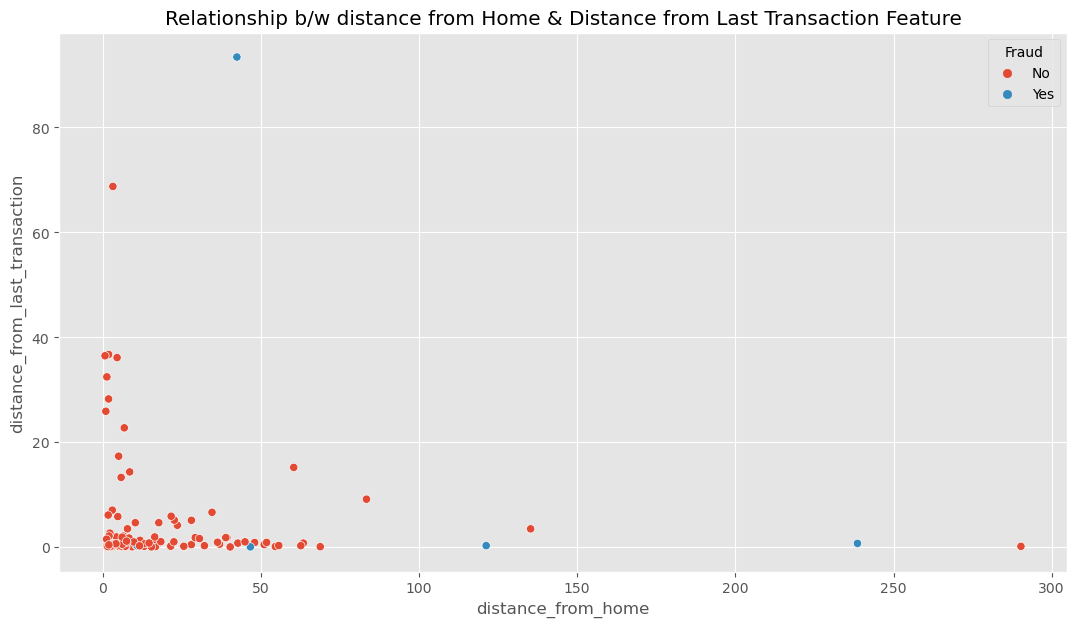

In [83]:
ax=sns.scatterplot(data=df,x='distance_from_home',y='distance_from_last_transaction',hue='fraud')
ax.set_title('Relationship b/w distance from Home & Distance from Last Transaction Feature')
legend_handles, _= ax.get_legend_handles_labels()
ax.legend(legend_handles, ['No','Yes'], bbox_to_anchor=(1,1),title='Fraud')
plt.show()

Insights:
 - From the above plot, we can see that most of the data points are clumped around the lower left corner, which indicates that most of the transactions were occurred around the home.

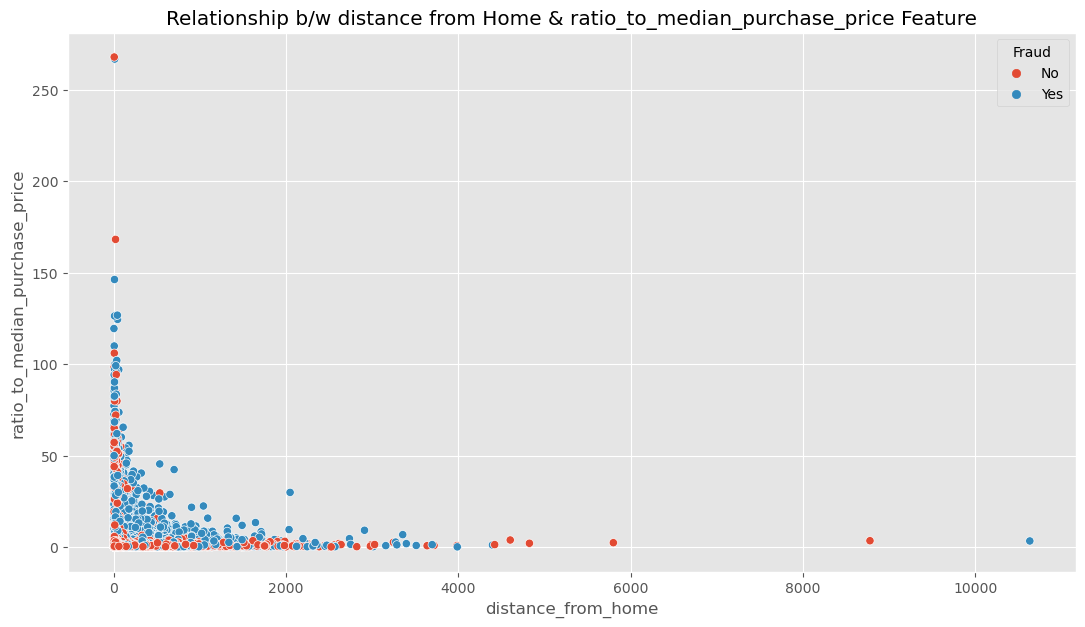

In [84]:
ax=sns.scatterplot(data=df,x='distance_from_home',y='ratio_to_median_purchase_price',hue='fraud')
ax.set_title('Relationship b/w distance from Home & ratio_to_median_purchase_price Feature')
legend_handles, _= ax.get_legend_handles_labels()
ax.legend(legend_handles, ['No','Yes'], bbox_to_anchor=(1,1),title='Fraud')
plt.show()

Insights:
 - From the above plot, we can see that majority of the data points clustered around lower left corner of the plot and number of fraudulent transactions increases as the ratio to median purchase price increases. It shows that ratio to median purchase price is a good predicator for predicting fraudulent transactions.

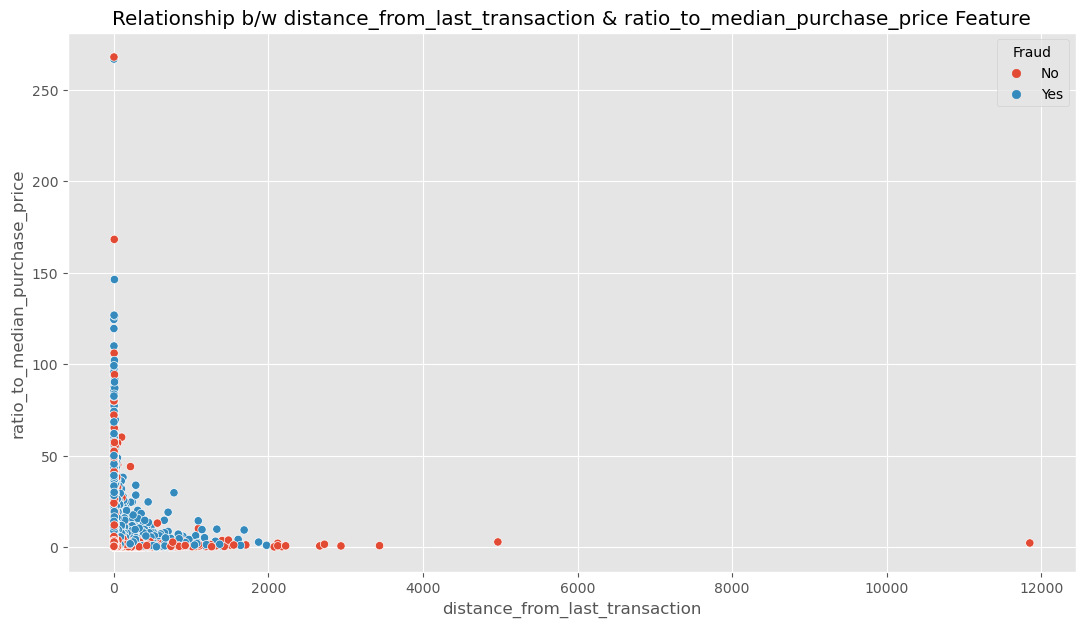

In [85]:
ax=sns.scatterplot(data=df,x='distance_from_last_transaction',y='ratio_to_median_purchase_price',hue='fraud')
ax.set_title('Relationship b/w distance_from_last_transaction & ratio_to_median_purchase_price Feature')
legend_handles, _= ax.get_legend_handles_labels()
ax.legend(legend_handles, ['No','Yes'], bbox_to_anchor=(1,1),title='Fraud')
plt.show()

Insights:
 - From the plot, we can see that most of the transactions were occurred in the vicinity of the previous transactions. There were some red points around the baseline near the x-axis which indicates even though the ratio between the current transaction and median transaction value is less, as the distance increases there is a higher change for the transactions to be fraudulent. 

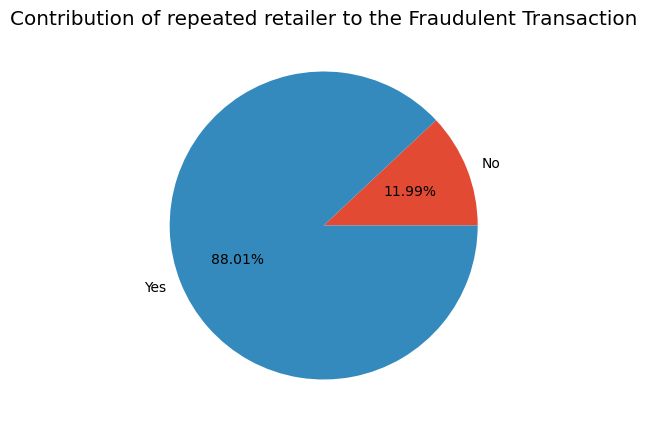

In [92]:
df_grouped_rr=df[df['fraud']==1].groupby('repeat_retailer')['fraud'].count()
plt.figure(figsize=(10,5))
plt.pie(df_grouped_rr,autopct='%.2f%%',labels=['No','Yes'])
plt.title('Contribution of repeated retailer to the Fraudulent Transaction')
plt.show()

Insights:
 - From the Pie Chart, we can see that around 88% of total fraudulent transactions were performed with the repeated retailers itself.

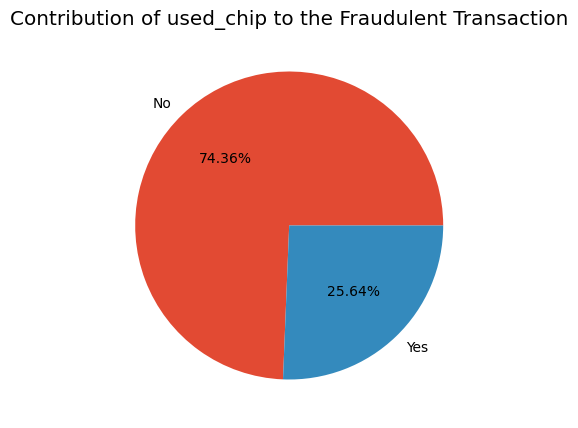

In [94]:
df_grouped_rr=df[df['fraud']==1].groupby('used_chip')['fraud'].count()
plt.figure(figsize=(10,5))
plt.pie(df_grouped_rr,autopct='%.2f%%',labels=['No','Yes'])
plt.title('Contribution of used_chip to the Fraudulent Transaction')
plt.show()

Insights:
 - Almost 75% of fraudulent transactions were occurred when the transaction was performed without chip based cards. From this we can infer that transactions without chip based cards most likely to be fraudulent.

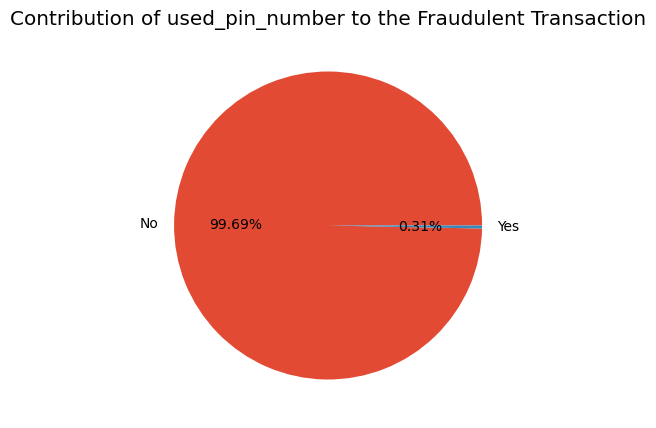

In [95]:
df_grouped_rr=df[df['fraud']==1].groupby('used_pin_number')['fraud'].count()
plt.figure(figsize=(10,5))
plt.pie(df_grouped_rr,autopct='%.2f%%',labels=['No','Yes'])
plt.title('Contribution of used_pin_number to the Fraudulent Transaction')
plt.show()

Insights:
 - Out of All the fraudulent transactions 99% of them were happened when the transaction was performed without PIN Number. From we can Almost certain that transactions without PIN Numbers is highly likely to be fraudulent.

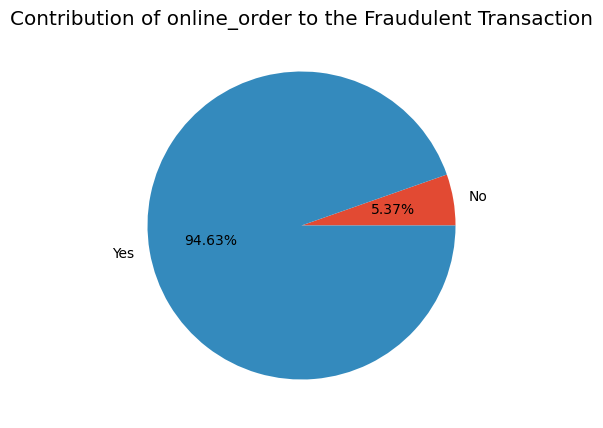

In [97]:
df_grouped_rr=df[df['fraud']==1].groupby('online_order')['fraud'].count()
plt.figure(figsize=(10,5))
plt.pie(df_grouped_rr,autopct='%.2f%%',labels=['No','Yes'])
plt.title('Contribution of online_order to the Fraudulent Transaction')
plt.show()

Insights:
 - From the Pie Chart, we can see that around 95% of the Online transactions were fraudulent.

### Outlier Treatment

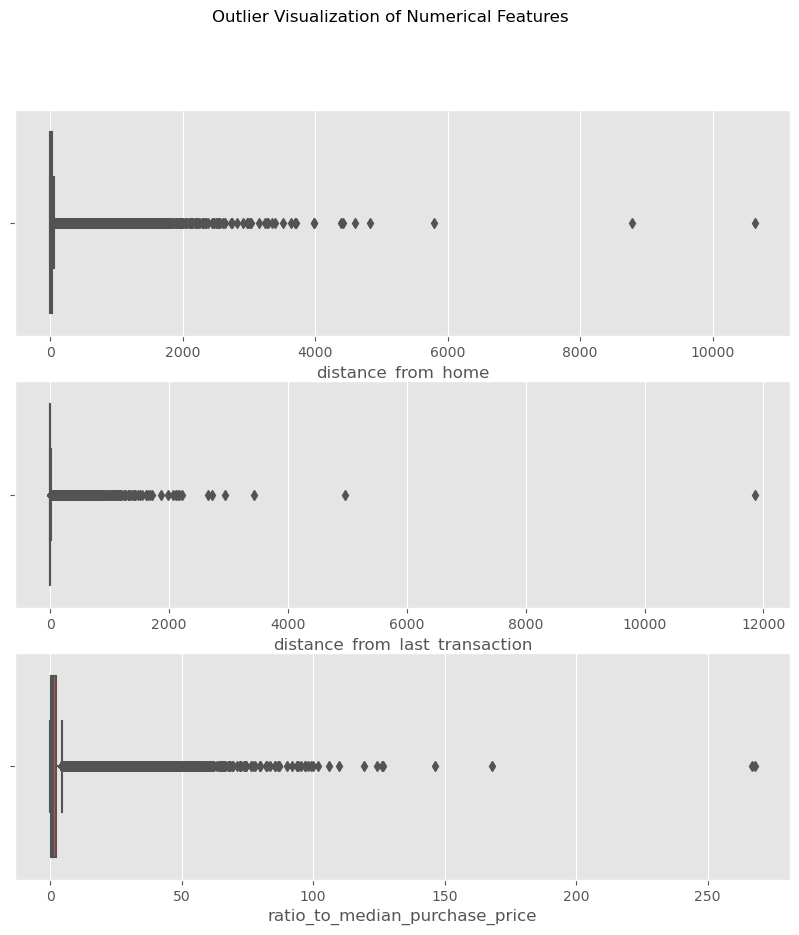

In [100]:
fig,ax=plt.subplots(3,1,figsize=(10,10))
plt.suptitle('Outlier Visualization of Numerical Features')
for i in range(len(numeric_cols)):
    sns.boxplot(data=df,x=numeric_cols[i],ax=ax[i])
plt.show()

Inference:
 - From the box plot, we can see that all the numerical features has outliers in large numbers. It possibly because of the ouccurrences of low values piled up in large numbers.

In [10]:
#function to calculate the lower and upper range of the numerical features for outlier treatment
def capping_fn(data,col,ratio=3):
    
    lower=np.percentile(data[col],25)
    upper=np.percentile(data[col],75)

    IQR=upper-lower
    lrange=lower-IQR*ratio
    urange=upper+IQR*ratio
    return lrange if lrange>=0 else 0,urange

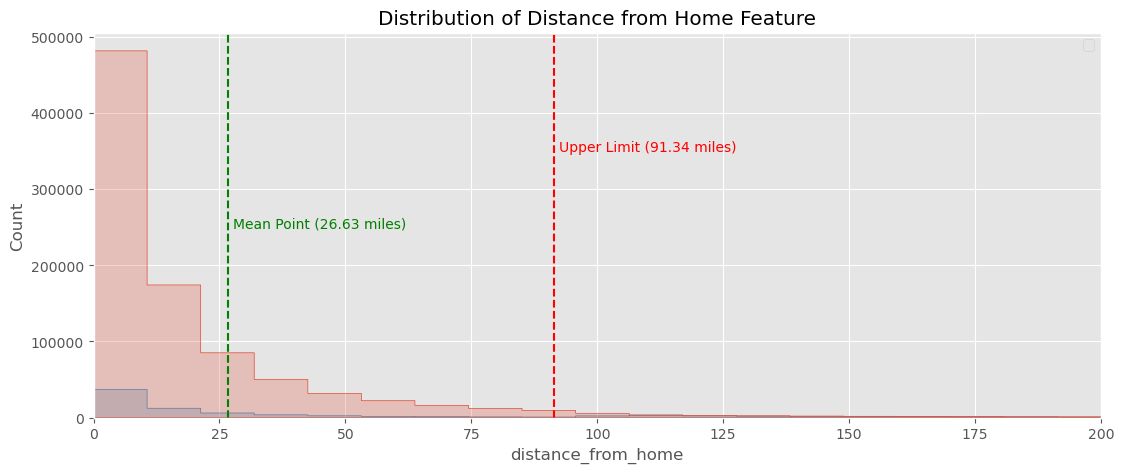

In [11]:
#visualizing the mean and upper limit value of features
mean_point1=df['distance_from_home'].mean()
low,high=capping_fn(df,'distance_from_home')
plt.figure(figsize=(13,5))
ax=sns.histplot(data=df,x='distance_from_home',bins=1000,hue='fraud',element='step')
handles,_=ax.get_legend_handles_labels()
ax.legend(handles,['No','Yes'])
ax.set_xlim([0,200])
ax.axvline(x=mean_point1,linestyle='--',color='green')
ax.annotate(f'Mean Point ({mean_point1:.2f} miles)',(mean_point1+1,250000),color='green')
ax.axvline(x=high,linestyle='--',color='red')
ax.annotate(f'Upper Limit ({high:.2f} miles)',(high+1,350000),color='red')
ax.set_title('Distribution of Distance from Home Feature')
plt.show()

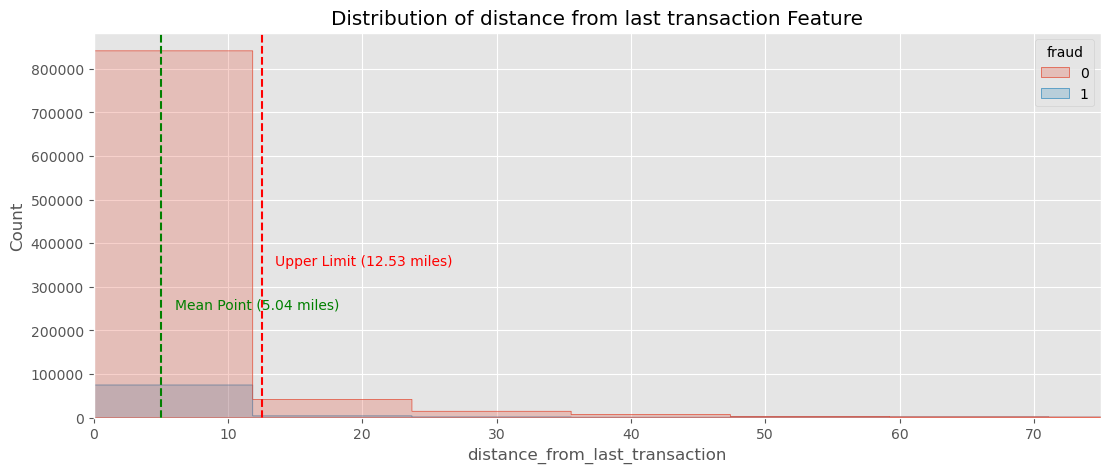

In [12]:
mean_point2=df['distance_from_last_transaction'].mean()
low,high=capping_fn(df,'distance_from_last_transaction')
plt.figure(figsize=(13,5))
ax=sns.histplot(data=df,x='distance_from_last_transaction',bins=1000,hue='fraud',element='step')
ax.set_xlim([0,75])
ax.axvline(x=mean_point2,linestyle='--',color='green')
ax.annotate(f'Mean Point ({mean_point2:.2f} miles)',(mean_point2+1,250000),color='green')
ax.axvline(x=high,linestyle='--',color='red')
ax.annotate(f'Upper Limit ({high:.2f} miles)',(high+1,350000),color='red')
ax.set_title('Distribution of distance from last transaction Feature')
plt.show()

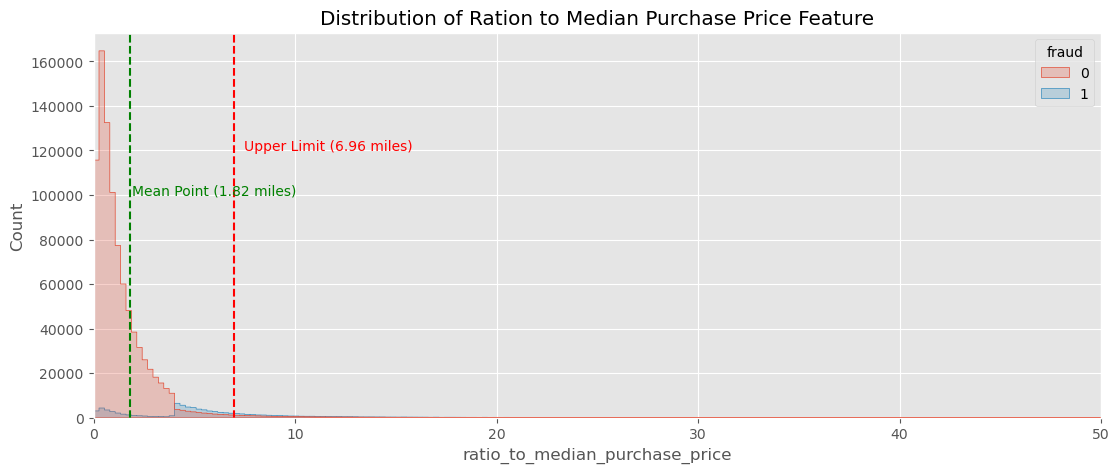

In [13]:
mean_point3=df['ratio_to_median_purchase_price'].mean()
low,high=capping_fn(df,'ratio_to_median_purchase_price')
plt.figure(figsize=(13,5))
ax=sns.histplot(data=df,x='ratio_to_median_purchase_price',bins=1000,hue='fraud',element='step')
ax.set_xlim([0,50])
ax.axvline(x=mean_point3,linestyle='--',color='green')
ax.annotate(f'Mean Point ({mean_point3:.2f} miles)',(mean_point3+0.1,100000),color='green')
ax.axvline(x=high,linestyle='--',color='red')
ax.annotate(f'Upper Limit ({high:.2f} miles)',(high+0.5,120000),color='red')
ax.set_title('Distribution of Ration to Median Purchase Price Feature')
plt.show()

In [14]:
#function to perform capping on the numerical features to eliminate the outliers
def clipper(data,cols,range_fn=capping_fn):
    for col in cols:
        low,high=capping_fn(data,col)
        data[col]=np.clip(data[col],low,high)

In [15]:
clipper(df,numeric_cols)

In [16]:
df.duplicated().sum() #checking the duplicates after performing capping

175

In [17]:
df.drop_duplicates(subset=numeric_cols,inplace=True) #dropping duplicates from the dataframe

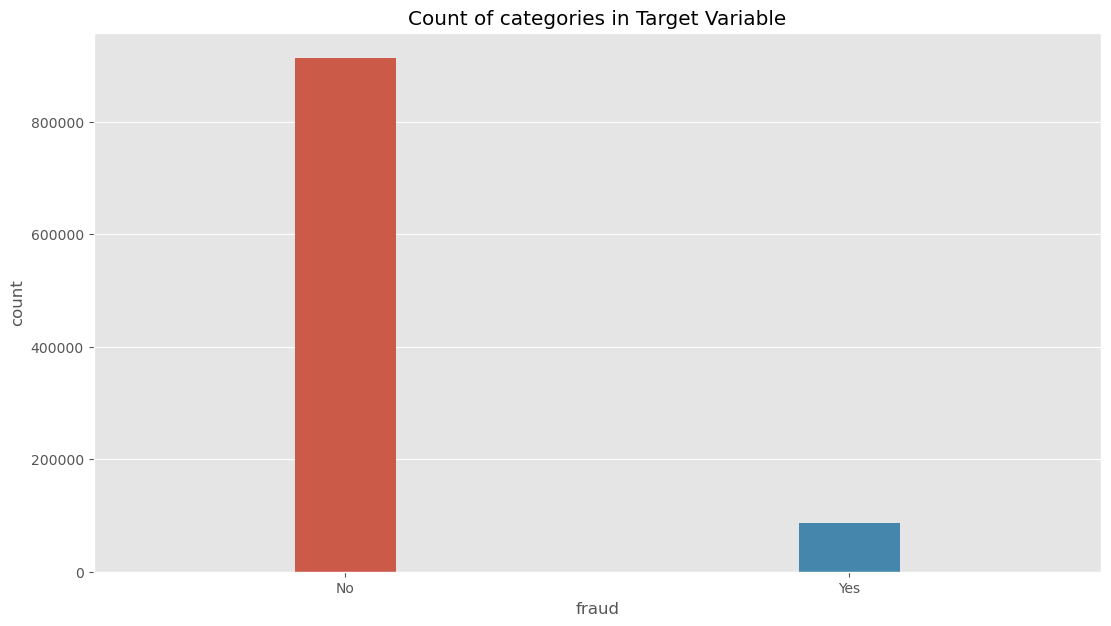

In [18]:
#visualizing the count of fraud and non-fraud transactions to analyze balance of the target categories
sns.countplot(data=df,x='fraud',width=0.2)
plt.title('Count of categories in Target Variable')
plt.xticks([0,1],['No','Yes'])
plt.show()

Inference:
 - The above plot shows that the number of fraudulent transactions were less than number of genuine transactions. It creates an imbalance in the dataset which could introduce bias in the model prediction. The imblance needs to be treated before feeding the data into the model.

In [19]:
X=df.drop('fraud',axis=1) #creating the X and y variables for model building
y=df['fraud']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
#splitting the data into train and test for model training and validation
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [22]:
from sklearn.feature_selection import chi2,RFE,f_classif

In [23]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [24]:
f_stat,p=chi2(x_train[categorical_cols[:-1]],y_train)

In [378]:
list(zip(categorical_cols[:-1],p))

[('repeat_retailer', 0.6724726066993161),
 ('used_chip', 0.0),
 ('used_pin_number', 0.0),
 ('online_order', 0.0)]

In [27]:
fstat_num,p_val=f_classif(x_train[numeric_cols],y_train)

In [377]:
list(zip(numeric_cols,p_val))

[('distance_from_home', 0.0),
 ('distance_from_last_transaction', 0.0),
 ('ratio_to_median_purchase_price', 0.0)]

forest=RandomForestClassifier(max_depth=6)

scores_train=dict.fromkeys(range(1,len(x_train.columns)+1),0)

best_features=dict.fromkeys(range(1,len(x_train.columns)+1),0)

from itertools import combinations

from tqdm import tqdm
with tqdm(total=len(x_train.columns)+1) as pbar:
    for i in range(1,len(x_train.columns)+1):
        current_score_train=0
        for j in combinations(x_train.columns,i):
            forest.fit(x_train[list(j)],y_train)
            current=forest.score(x_train[list(j)],y_train)
            if current>current_score_train:
                current_score_train=current
                bs=j
        scores_train[i]=current_score_train
        best_features[i]=bs
        pbar.update(10)

In [ ]:
scores_train={1: 0.9394372375401683,
 2: 0.9665123044455463,
 3: 0.9727649031461603,
 4: 0.9823695577315184,
 5: 0.9914012479478302,
 6: 0.9914012479478302,
 7: 0.9914012479478302}


best_features={1: ('ratio_to_median_purchase_price',),
 2: ('ratio_to_median_purchase_price', 'online_order'),
 3: ('ratio_to_median_purchase_price', 'used_pin_number', 'online_order'),
 4: ('distance_from_home',
  'ratio_to_median_purchase_price',
  'used_chip',
  'online_order'),
 5: ('distance_from_home',
  'ratio_to_median_purchase_price',
  'used_chip',
  'used_pin_number',
  'online_order'),
 6: ('distance_from_home',
  'ratio_to_median_purchase_price',
  'repeat_retailer',
  'used_chip',
  'used_pin_number',
  'online_order'),
 7: ('distance_from_home',
  'distance_from_last_transaction',
  'ratio_to_median_purchase_price',
  'repeat_retailer',
  'used_chip',
  'used_pin_number',
  'online_order')}

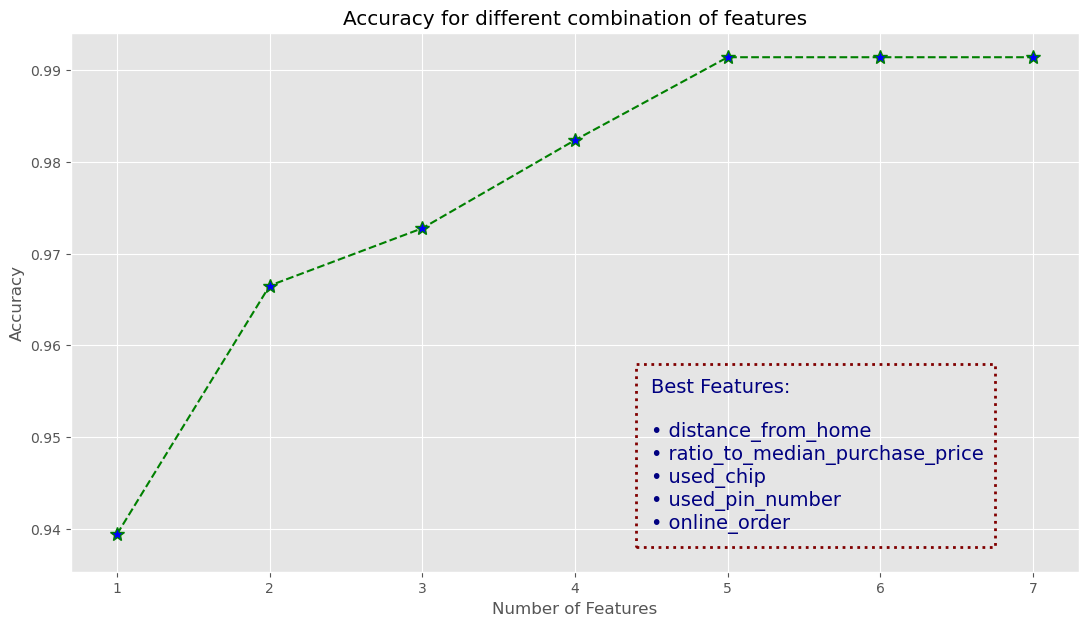

In [113]:
fig,ax=plt.subplots()
ax.plot(range(1,8),scores_train.values(),marker='*',mfc='blue',ms=10,color='green',linestyle='--')
ax.set_xlabel('Number of Features')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy for different combination of features')
ax.text(4.5,0.94,'Best Features:\n\n\u2022 {}\n\u2022 {}\n\u2022 {}\n\u2022 {}\n\u2022 {}'.format(*best_features[5]),fontdict={'color':'navy','size':14})
ax.add_patch(plt.Rectangle((4.4,0.938),2.35,0.02,color='maroon',fill=False,linewidth=2,linestyle='dotted'))
plt.show()

In [117]:
x_train_selected=x_train[['distance_from_home',
  'ratio_to_median_purchase_price',
  'used_chip',
  'used_pin_number',
  'online_order']]

x_test_selected=x_test[['distance_from_home',
  'ratio_to_median_purchase_price',
  'used_chip',
  'used_pin_number',
  'online_order']]

In [118]:
from imblearn.under_sampling import RandomUnderSampler

In [119]:
rus=RandomUnderSampler(random_state=42)

In [120]:
#resampling the data using under sampling technique
x_train_resampled,y_train_resampled=rus.fit_resample(x_train_selected,y_train)

In [121]:
y_train_resampled.value_counts() #checking the count of target variable after resampling

fraud
0    61057
1    61057
Name: count, dtype: int64

In [122]:
from sklearn.preprocessing import StandardScaler

In [123]:
ss=StandardScaler()

In [125]:
x_train_scaled=x_train_resampled
x_test_scaled=x_test_selected

In [128]:
#scaling the data using standard scaler to normalize the numerical features
n_cols=['distance_from_home','ratio_to_median_purchase_price']
x_train_scaled[n_cols]=ss.fit_transform(x_train_resampled[n_cols])
x_test_scaled[n_cols]=ss.transform(x_test[n_cols])

In [265]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

In [171]:
#Running model with different tree depth to find ideal tree depth value
def parameter_tuner(param_name,param_val):
    train_score={'Accuracy':[],'F1-Score':[]}
    test_score={'Accuracy':[],'F1-Score':[]}
    for i in param_val:
        rfc=RandomForestClassifier()
        rfc.__dict__[param_name]=i
        rfc.fit(x_train_scaled,y_train_resampled)
        y_pred_train=rfc.predict(x_train_scaled)
        y_pred_test=rfc.predict(x_test_scaled)

        accuracy_train=accuracy_score(y_train_resampled,y_pred_train)
        accuracy_test=accuracy_score(y_test,y_pred_test)

        recall_train=f1_score(y_train_resampled,y_pred_train)
        recall_test=f1_score(y_test,y_pred_test)

        train_score['Accuracy'].append(accuracy_train)
        test_score['Accuracy'].append(accuracy_test)

        train_score['F1-Score'].append(recall_train)
        test_score['F1-Score'].append(recall_test)
    return train_score,test_score

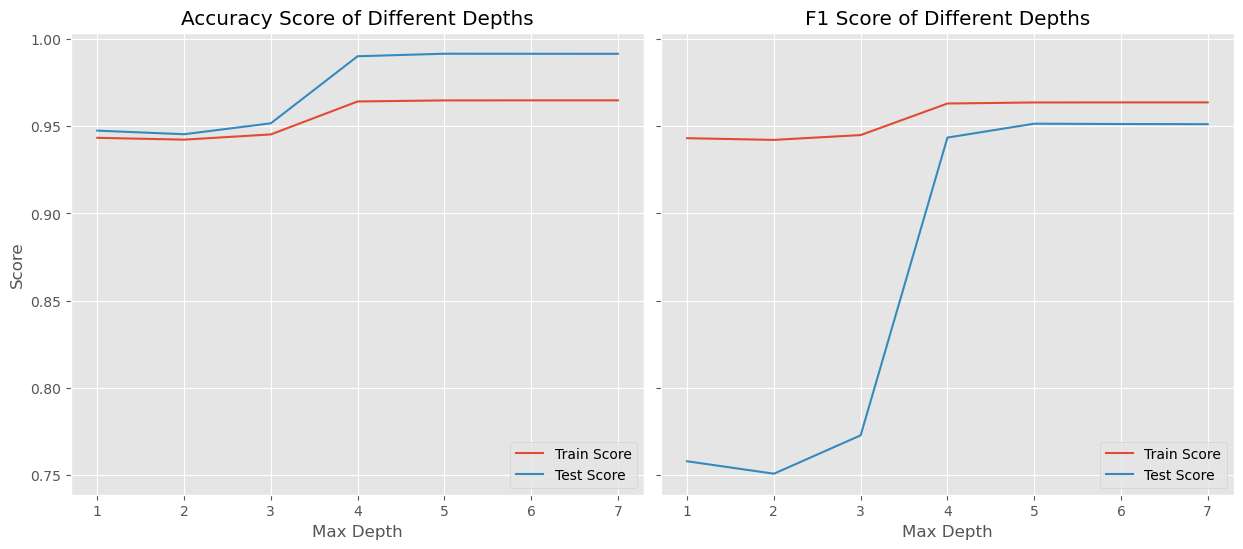

In [172]:
#Plotting model accuracy and recall score for each tree depth to find the optimal depth of the tree
train_score,test_score=parameter_tuner('max_depth',list(range(1,8)))
fig,ax=plt.subplots(1,2,figsize=(15,6),sharey=True)
plt.subplots_adjust(wspace=0.03)
sns.lineplot(x=np.arange(1,8),y=train_score['Accuracy'],label='Train Score',ax=ax[0])
sns.lineplot(x=np.arange(1,8),y=test_score['Accuracy'],label='Test Score',ax=ax[0])


ax[0].legend(loc='lower right')
ax[0].set_title('Accuracy Score of Different Depths')
ax[0].set_xlabel('Max Depth')
ax[0].set_ylabel('Score')

sns.lineplot(x=np.arange(1,8),y=train_score['F1-Score'],label='Train Score',ax=ax[1])
sns.lineplot(x=np.arange(1,8),y=test_score['F1-Score'],label='Test Score',ax=ax[1])

ax[1].legend(loc='lower right')
ax[1].set_title('F1 Score of Different Depths')
ax[1].set_xlabel('Max Depth')

plt.show()

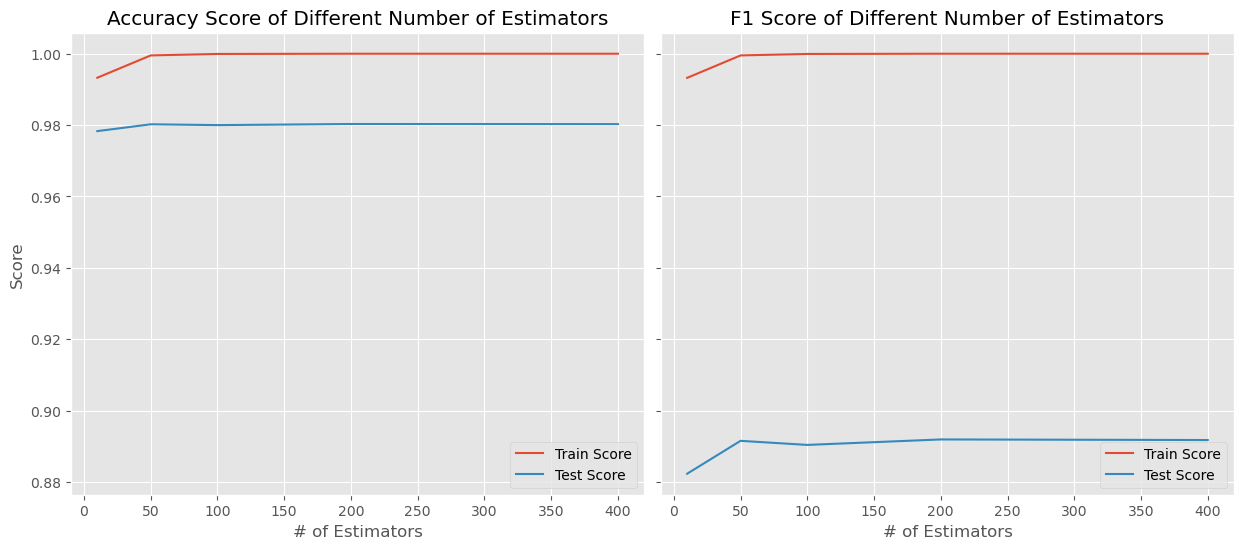

In [181]:
train_score,test_score=parameter_tuner('n_estimators',[10,50,100,200,400])

fig,ax=plt.subplots(1,2,figsize=(15,6),sharey=True)
plt.subplots_adjust(wspace=0.03)
sns.lineplot(x=[10,50,100,200,400],y=train_score['Accuracy'],label='Train Score',ax=ax[0])
sns.lineplot(x=[10,50,100,200,400],y=test_score['Accuracy'],label='Test Score',ax=ax[0])


ax[0].legend(loc='lower right')
ax[0].set_title('Accuracy Score of Different Number of Estimators')
ax[0].set_xlabel('# of Estimators')
ax[0].set_ylabel('Score')

sns.lineplot(x=[10,50,100,200,400],y=train_score['F1-Score'],label='Train Score',ax=ax[1])
sns.lineplot(x=[10,50,100,200,400],y=test_score['F1-Score'],label='Test Score',ax=ax[1])

ax[1].legend(loc='lower right')
ax[1].set_title('F1 Score of Different Number of Estimators')
ax[1].set_xlabel('# of Estimators')

plt.show()

In [174]:
rfc=RandomForestClassifier(max_depth=5,n_estimators=50)

In [175]:
rfc.fit(x_train_scaled,y_train_resampled)

RandomForestClassifier(max_depth=5, n_estimators=50)

In [176]:
from sklearn.metrics import classification_report

In [177]:
print(classification_report(y_test,rfc.predict(x_test_scaled)))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    273776
           1       0.97      0.93      0.95     26168

    accuracy                           0.99    299944
   macro avg       0.98      0.97      0.97    299944
weighted avg       0.99      0.99      0.99    299944



In [151]:
from sklearn.metrics import roc_curve,roc_auc_score,ConfusionMatrixDisplay

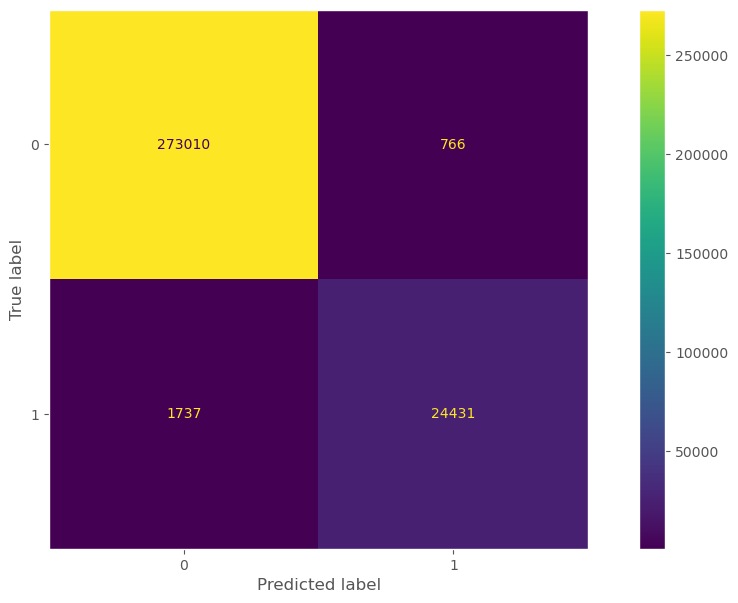

In [178]:
ConfusionMatrixDisplay.from_estimator(rfc,x_test_scaled,y_test) #plotting the confusion matrix to analyze the model prediction results
plt.grid(False)
plt.show()

In [194]:
y_pred=rfc.predict_proba(x_test_scaled)

fpr,tpr,_=roc_curve(y_test,y_pred[:,1],pos_label=1)

auc=roc_auc_score(y_test,y_pred[:,1])

0.9841651227326034

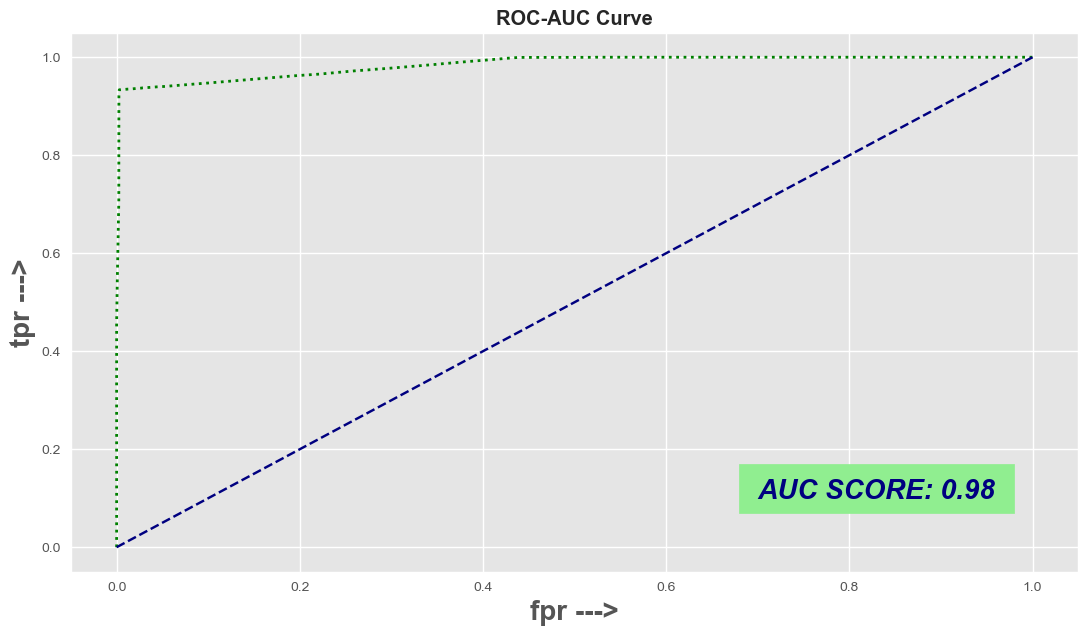

In [376]:
plt.plot(fpr,tpr,color='green',ls=':',lw=2)
plt.plot([0,1],[0,1],color='navy',ls='dashed')
plt.fill_between([0.68,0.98],0.07,0.17,color='lightgreen')
plt.text(0.7,0.1,f'AUC SCORE: {auc:.2f}',fontdict={'size':20,'color':'navy','weight':'bold','style':'italic'})
plt.xlabel('fpr --->',fontweight='bold',fontsize=20)
plt.ylabel('tpr --->',fontweight='bold',fontsize=20)
plt.title('ROC-AUC Curve',fontweight='bold')
plt.show()

In [375]:
print('-'*70)
print('|','\033[91m\033[1mPerformance Report\033[0m'.center(79),'|')
print('='*70)
print('|','\033[1m\t    Train Data\033[0m \t\t\t    \033[1mTest Data\033[0m','|'.rjust(16))
print('='*70)

pred_train=rfc.predict(x_train_scaled)
pred_test=rfc.predict(x_test_scaled)
accuracy_train=accuracy_score(y_train_resampled,pred_train)
precision_train=precision_score(y_train_resampled,pred_train)
recall_train=recall_score(y_train_resampled,pred_train)
f1_train=f1_score(y_train_resampled,pred_train)

accuracy_test=accuracy_score(y_test,pred_test)
precision_test=precision_score(y_test,pred_test)
recall_test=recall_score(y_test,pred_test)
f1_test=f1_score(y_test,pred_test)

cvs=cross_val_score(rfc,x_train_scaled,y_train_resampled).mean()

print('|',f'Accuracy:\t{accuracy_train:.2f}\t\t\t\t{accuracy_test:.2f}','|'.rjust(17))
print('|',f'Precision:\t{precision_train:.2f}\t\t\t\t{precision_test:.2f}','|'.rjust(17))
print('|',f'Recall:\t{recall_train:.2f}\t\t\t\t{recall_test:.2f}','|'.rjust(17))
print('|',f'F1-Score:\t{f1_train:.2f}\t\t\t\t{f1_test:.2f}','|'.rjust(17))
print('='*70)
print('|',f'\033[01m\033[94mCrossValScore:  {cvs:.2f}\033[0m'.center(75),'|'.rjust(6))
print('-'*70)

----------------------------------------------------------------------
|                         Performance Report                         |
| 	    Train Data 			    Test Data                |
| Accuracy:	0.96				0.99                 |
| Precision:	1.00				0.97                 |
| Recall:	0.93				0.93                 |
| F1-Score:	0.96				0.95                 |
|                      CrossValScore:  0.96                          |
----------------------------------------------------------------------


### Summary

   - Imported the necessary modules for the project and check the outline of the data.
   - Performed preprocessing steps to **remove the outliers and duplicate records.**
   - Performed exploratory analysis to **visualize the distribution of the different features and to identify the relationship between multiple features.**
   - Used **Standard Scaler to normalize the numerical data columns.**
   - Utilized **SMOTE method** to treat the **imbalance nature of the dataset.**
   - Built **`Random Forest Classification** model to classify fraudulent and non fradulent transactions.
   - Performed Hyper Parameter tuning to improve the **model prediction power and achieved 2% improvement.**
   - Evaluated the performance of the model using **Accuracy, Precision, Recall and F1-Score.**
   - Achieved overall model **prediction score of 96%.**